In [ ]:
%load_ext autoreload
%autoreload 2

from topic_modeling import *
import warnings
warnings.filterwarnings('ignore')

df_type = 'pos'
N_TOPICS = 12
datafile = 'dataset/movies1gb.txt'

In [2]:
fullReviewsDf = load_data(datafile)
fullReviewsDf.show()

Dataframe length: 846781
+----------+--------------+--------------------+-----------+-----+----------+--------------------+--------------------+
| ProductId|        UserId|         ProfileName|Helpfulness|Score|      Time|             Summary|                Text|
+----------+--------------+--------------------+-----------+-----+----------+--------------------+--------------------+
|B003AI2VGA|A141HP4LYPWMSR|Brian E. Erland "...|        7/7|    3|1182729600|"There Is So Much...|Synopsis: On the ...|
|B003AI2VGA|A328S9RN3U5M68|          Grady Harp|        4/4|    3|1181952000|Worthwhile and Im...|THE VIRGIN OF JUA...|
|B003AI2VGA|A1I7QGUDP043DG|Chrissy K. McVay ...|       8/10|    5|1164844800|This movie needed...|The scenes in thi...|
|B003AI2VGA|A1M5405JH9THP9|        golgotha.gov|        1/1|    3|1197158400|distantly based o...|THE VIRGIN OF JUA...|
|B003AI2VGA| ATXL536YX71TR|KerrLines "&#34;M...|        1/1|    3|1188345600|"What's going on ...|Informationally, ...|
|B003AI2VGA|A3Q

In [3]:
posDf, negDf = split_reviews(fullReviewsDf)
if df_type == 'pos':
    fullReviewsDf = posDf
elif df_type == 'neg':
    fullReviewsDf = negDf    

# Preprocessing

Tokenized words were fit into Word Count Vectorizer. Each review was represented by a word count vector (count of word occurrence in corresponding review). Frequent words that provide no contextual information were removed from the vocabulary, e.g. ‘movie’, ‘film’.

In [4]:
tokenizedDf = preprocess(fullReviewsDf)
tokenizedDf.show(truncate=True)

+----------+--------------+--------------------+-----+
| ProductId|        UserId| Text_FilteredTokens|Score|
+----------+--------------+--------------------+-----+
|B003AI2VGA|A141HP4LYPWMSR|[synopsis, daily,...|    3|
|B003AI2VGA|A328S9RN3U5M68|[virgin, juarez, ...|    3|
|B003AI2VGA|A1I7QGUDP043DG|[scene, disquieti...|    5|
|B003AI2VGA|A1M5405JH9THP9|[virgin, juarez, ...|    3|
|B003AI2VGA| ATXL536YX71TR|[informationally,...|    3|
|B00006HAXW| AD4CDZK7D31XP|[past, year, publ...|    5|
|B00006HAXW|A3Q4S5DFVPB70D|[recvd, video, dv...|    5|
|B00006HAXW|A2P7UB02HAVEPB|[wow, saw, show, ...|    5|
|B00006HAXW|A2TX99AZKDK0V7|[doo, wop, dvd, a...|    4|
|B00006HAXW| AFC8IKR407HSK|[worked, televisi...|    5|
|B00006HAXW|A1FRPGQYQTAOR1|[people, reviewed...|    5|
|B00006HAXW|A1RSDE90N6RSZF|[doo, wop, dvd, g...|    5|
|B00006HAXW|A1OUBOGB5970AO|[performance, lit...|    4|
|B00006HAXW|A3NPHQVIY59Y0Y|[get, also, get, ...|    5|
|B00006HAXW| AFKMBAY28XO8A|[excellent, excel...|    5|
|B00006HAX

In [5]:
vectorizedDf, wordVectorizerModel = vectorize_df(tokenizedDf)
vectorVocabulary = wordVectorizerModel.vocabulary
vectorizedDf.show()

+----------+--------------+--------------------+-----+--------------------+
| ProductId|        UserId| Text_FilteredTokens|Score|         Text_Vector|
+----------+--------------+--------------------+-----+--------------------+
|B003AI2VGA|A141HP4LYPWMSR|[synopsis, daily,...|    3|         (300,[],[])|
|B003AI2VGA|A328S9RN3U5M68|[virgin, juarez, ...|    3|         (300,[],[])|
|B003AI2VGA|A1I7QGUDP043DG|[scene, disquieti...|    5|         (300,[],[])|
|B003AI2VGA|A1M5405JH9THP9|[virgin, juarez, ...|    3|(300,[4,106],[4.0...|
|B003AI2VGA| ATXL536YX71TR|[informationally,...|    3|         (300,[],[])|
|B00006HAXW| AD4CDZK7D31XP|[past, year, publ...|    5|    (300,[58],[4.0])|
|B00006HAXW|A3Q4S5DFVPB70D|[recvd, video, dv...|    5|         (300,[],[])|
|B00006HAXW|A2P7UB02HAVEPB|[wow, saw, show, ...|    5|         (300,[],[])|
|B00006HAXW|A2TX99AZKDK0V7|[doo, wop, dvd, a...|    4|    (300,[40],[4.0])|
|B00006HAXW| AFC8IKR407HSK|[worked, televisi...|    5|         (300,[],[])|
|B00006HAXW|

# Topic Modeling

The topic modeling aims to discover groups of word (topics) in the collection of reviews. The topics were used to understand and summarize the textual information.

In [6]:
ldaModel, ldaTopicsDf = lda_fit(vectorizedDf, vectorVocabulary, n_topics=N_TOPICS)
ldaTopicsDf.show()

22/06/01 15:57:32 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/06/01 15:57:32 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


Terms of each topic identified by LDA
+---------+--------+-------+-----------+--------+------+----------+---------+-------+-------+-----------+---------+
|       _1|      _2|     _3|         _4|      _5|    _6|        _7|       _8|     _9|    _10|        _11|      _12|
+---------+--------+-------+-----------+--------+------+----------+---------+-------+-------+-----------+---------+
|     like|    love|episode|performance|american| actor|     watch|    house|    boy|   plot|     played|     want|
|  version|original| horror|     family|    year|  girl|       way|     look|   role|  still|        old|      son|
|     good|     see| series|        war|    play|   guy|      part|      bad|  death|    lot|      sound|   review|
|      get|    well|    day|      think|     set| black|      find|      fan|   real| mother|documentary|   effect|
|     book|   alien|   best|       also|     kid|little|      dead|   friend|  night|picture|       cast|     last|
|    story|    much|  world|      

In [7]:
topicDf, topicScoresDf = lda_transform(vectorizedDf, ldaModel)
topicDf.show()

+----------+--------------+-----+------+-----+
| ProductId|        UserId|topic|length|score|
+----------+--------------+-----+------+-----+
|B003AI2VGA|A1M5405JH9THP9|    6|   235|    3|
|B00006HAXW| AD4CDZK7D31XP|    0|   159|    5|
|B00006HAXW|A2TX99AZKDK0V7|    0|   138|    4|
|B00006HAXW| AFJ27ZV9183B8|    0|   250|    5|
|B00006HAXW| AXMKAXC0TR9AW|    9|    94|    5|
|B00004CQT3|A1CIW2OEVAJRM2|    1|   153|    5|
|B00004CQT3|A1D12NAC1U12F0|    0|    89|    5|
|B00004CQT3|A2582KMXLK2P06|    0|   224|    3|
|B0078V2LCY|A27H9DOUGY9FOS|    0|   275|    3|
|B003ZG3GAM| ATK3QFC6L1318|    9|    54|    5|
|B004BH1TN0| AUQW6UEZFC7B2|    2|    64|    5|
|B0071AD95K|A2OKCS5234ZV7S|    2|   134|    5|
|B000063W1R|A3QIEISBZP4QTV|    0|   186|    5|
|B000063W1R|A3R95JCH1K9R0S|    0|    84|    5|
|B000063W1R|A1FBZRYTAA6O1Z|    4|   155|    5|
|B000063W1R|A2FEGRJQNU51P9|    2|   212|    4|
|B000063W1R|A18XYPKYS15YBP|    4|    68|    3|
|B000063W1R|A2198FZZMTJ38H|    3|   402|    5|
|B000063W1R|A

# Visualizations

## Transform data

In [8]:
termFrequencyDf = count_term_frequency(vectorizedDf, vectorVocabulary)
termFrequencyDf.show()

cloudDf = get_cloud_df(ldaTopicsDf, vectorVocabulary)
cloudDf.show()

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 643, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


+---------+---------+-----+
|     term|frequency|index|
+---------+---------+-----+
|     like|   376273|    0|
|     time|   355038|    1|
|    great|   351160|    2|
|     good|   331287|    3|
|    story|   285024|    4|
|      dvd|   273092|    5|
|      get|   258966|    6|
|     well|   255353|    7|
|character|   251138|    8|
|      see|   247515|    9|
|    would|   231959|   10|
|     make|   226422|   11|
|     love|   219788|   12|
|    scene|   218554|   13|
|     also|   210573|   14|
|     much|   203886|   15|
|     even|   197960|   16|
|     best|   191524|   17|
|    movie|   184896|   18|
|     life|   174613|   19|
+---------+---------+-----+
only showing top 20 rows



+-----+-----------+--------------------+
|topic|       term|         termWeights|
+-----+-----------+--------------------+
|    0|performance| 0.05055548390009848|
|    0|   american|  0.0357053311624317|
|    0|       plot| 0.02236973777464069|
|    0|       love| 0.12282265339205599|
|    0|    episode| 0.07111792680397826|
|    0|        boy| 0.02536041600901687|
|    0|      actor|  0.0301939189331448|
|    0|     played|0.021434423015724867|
|    0|      house|0.025756255143577256|
|    0|       like|  0.2814829244269502|
|    0|      watch|0.027804313531304452|
|    0|       want| 0.02057662538818285|
|    1|        way| 0.04507838721789864|
|    1|       year| 0.06289161090641987|
|    1|       look|0.040306187277605855|
|    1|   original| 0.09080792868009879|
|    1|        old|  0.0283052907157961|
|    1|        son|0.027539122218046386|
|    1|     family| 0.06707286435362332|
|    1|      still| 0.03286980494183065|
+-----+-----------+--------------------+
only showing top

## Word count

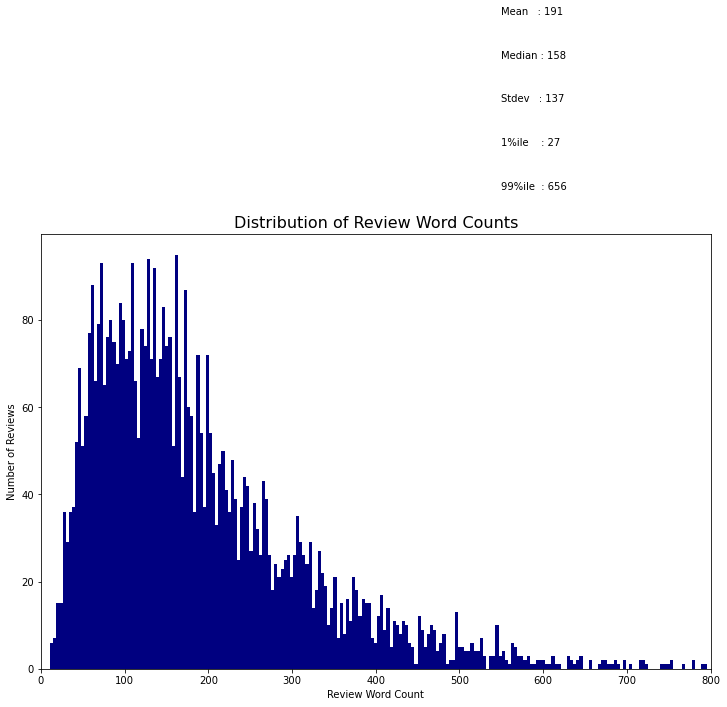

In [9]:
plot_word_count(topicDf, df_type)

## Distribution of Review Word Counts by LDA Topic

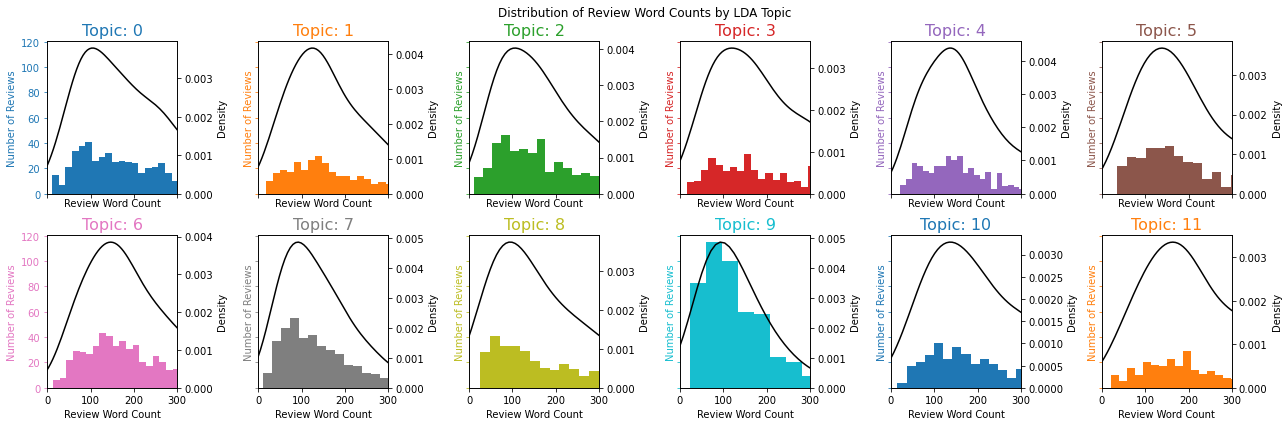

In [10]:
plot_word_count_by_topic(topicDf, n_topics=N_TOPICS, df_type=df_type)

## Wordcloud of Top N words in each topic

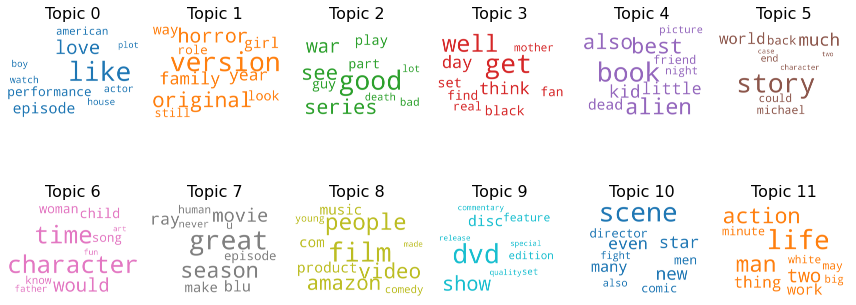

In [11]:
plot_cloud_by_topic(cloudDf, n_topics=N_TOPICS, df_type=df_type)

Word clouds of terms weight in each topic identified by LDA.

## pyLDAVis

In [12]:
import pyLDAvis

In [13]:
data = plot_lda(tokenizedDf, wordVectorizerModel, topicScoresDf, ldaModel)
py_lda_prepared_data = pyLDAvis.prepare(**data)
pyLDAvis.display(py_lda_prepared_data)